# Vaccination Tweets: EDA, Sentiment Analyis

Agenda:
+ Frequency
    + most frequent words in tweets
    + look at most popular hashtags (in 'text' and in 'hashtags')
    + what is the most tweeted-about vaccine?
+ Time
    + Which vaccine "trends" in tweets? (time series)
    + Do different vaccines trend at different times as tweet subjects?

+ Sentiment
    + vaccine most closely connected to negative/positive sentiment
    + most influential sources who tweet positive/negative/neutral about vaccines in general
    + locations (uncleared) with the most positive, negative, neutral tweets
    + Positive, negative, neutral: which gets more retweets / are liked more?

(Measuring general attitude via tweets: how many people tweet by population, how many by population tweet about vaccines, how well are vaccinations monitored)

+ id:
+ user_name:
+ user_location: entered by user
+ user_description: entered by user
+ user_created: date of when the account was opened
+ user_followers: number of users which follow a specified user
+ user_friends: number of users which a specified user follows
+ user_favourites: 
+ user_verified: accounts of officially recognized organizations, users with many followers
+ date: date of tweet
+ text: text of the tweet
+ hashtags: hashtags user in the tweet
+ source: 
+ retweets: number of retweets
+ favorites:
+ is_retweet: whether the tweets is a retweet or not

Added:
+ day: 

In [782]:
# Main data packages. 
import numpy as np
import pandas as pd
from datetime import datetime

import pickle

#text processing, NLP modules
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#plotting
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [783]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [784]:
df = pd.read_csv("Data/vaccination_tweets.csv")

In [786]:
df_tweety = df.copy()

In [787]:
shape = df_tweety.shape
print('The unmodified vaccination tweets dataset contains {} columns and {} rows.'.format(shape[1], shape[0]))

The unmodified vaccination tweets dataset contains 16 columns and 38547 rows.


In [773]:
df_tweety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38547 entries, 0 to 38546
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                38547 non-null  int64 
 1   user_name         38547 non-null  object
 2   user_location     29767 non-null  object
 3   user_description  35940 non-null  object
 4   user_created      38547 non-null  object
 5   user_followers    38547 non-null  int64 
 6   user_friends      38547 non-null  int64 
 7   user_favourites   38547 non-null  int64 
 8   user_verified     38547 non-null  bool  
 9   date              38547 non-null  object
 10  text              38547 non-null  object
 11  hashtags          30330 non-null  object
 12  source            38514 non-null  object
 13  retweets          38547 non-null  int64 
 14  favorites         38547 non-null  int64 
 15  is_retweet        38547 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.2+ MB


In [774]:
#Insert column 'day' to map the vaccination progress data set
df_tweety['day'] = pd.to_datetime(df_tweety.date).dt.date

In [775]:
df_tweety.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
day                 object
dtype: object

## Dropping stuff(?)

'user_location' is filled by users in an unsystematic way

In [788]:
df_tweety.user_location.nunique()

8098

In [778]:
#The below mentioned columns should be dropped
df_tweety.drop(['id', 'user_description', 'user_created', 'user_location', 'is_retweet', 'source'], axis=1)

,user_name,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day
0,Rachel Roh,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0,2020-12-20
1,Albert Fong,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1,2020-12-13
2,eli🇱🇹🇪🇺👌,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,2020-12-12
3,Charles Adler,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129,2020-12-12
4,Citizen News Channel,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...
38542,Rising Bharat,625,0,0,False,2021-03-18 06:22:41,The Sputnik V is under review for emergency us...,NaN,1,7,2021-03-18
38543,Bright Uzbekistan,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZB...,NaN,0,0,2021-03-18
38544,Sputnik V,223700,142,678,True,2021-03-18 06:01:50,Austrian Chancellor Sebastian Kurz: Concerning...,['SputnikV'],83,226,2021-03-18
38545,Sputnik,322326,306,24,True,2021-03-18 05:30:00,Norwegian politicians calling to cut #SputnikV...,['SputnikV'],6,16,2021-03-18


In [779]:
#There are duplicates in the text section, however, they ... check if source identical, there are no retweets, maybe duplicates should be removed in order to prevent imbalance
#df_tweety[(df_tweety.duplicated(subset=['text', 'user_name'], keep=False))]

## Reshape the data set

Tweets in 'text' are typically cut off (max 140 characters). The cut-off-pattern is '...', followed by an empty space and a link to the tweet. Using this pattern to reduce the dataset we receive a considerably shorter set of certainly complete tweets to analyze.

In [789]:
df_tweety = df_tweety[~(df_tweety['text'].str.contains('... http'))].reset_index()

In [790]:
df_tweety.shape

(5621, 17)

In [792]:
df_tweety.to_csv('fulltweets.csv')

While few tweet the same text more often, more than a fifth of users in the dataset tweet more than once. Assuming that repetitiveness is not linked towards particular sentiments, we leave all tweets in the dataset.

In [791]:
(len(df_tweety) - df_tweety.user_name.nunique())/len(df_tweety)

0.2284291051414339

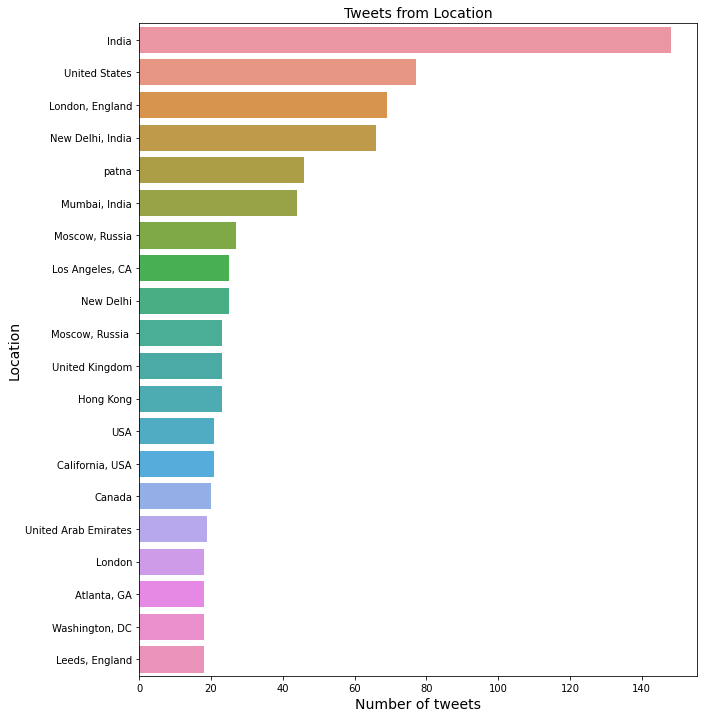

In [692]:
#user_location columns is very diverse
plt.figure(figsize=(10,12))
sns.barplot(df_tweety["user_location"].value_counts().values[0:20],
            df_tweety["user_location"].value_counts().index[0:20]);
plt.title("Tweets from Location",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

### Most frequent hashtags in 'hashtags'

Lists in 'hashtags' are stored as strings

In [695]:
#for i, l in enumerate(df_tweety['hashtags']):
    #print("list",i,"is",type(l))

lst_ = "['erst', 'zweit', 'dritt']"

def clean_hashtag(name):
    name = name.replace("[", "")
    name = name.replace("]", "")
    name = name.replace("'", "")
    name_lst = name.split(",")
    hash_lst = list()
    for item in name_lst:
        item = item.strip()
        hash_lst.append(item)
    return hash_lst

In [698]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

In [699]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_freq').reset_index(name='count')
hasht_freq

,hasht_freq,count
0,moderna,1935
1,covaxin,1356
2,pfizerbiontech,709
3,sputnikv,694
4,vaccine,543
5,covid19,525
6,oxfordastrazeneca,491
7,covidvaccine,354
8,pfizer,299
9,sinovac,252


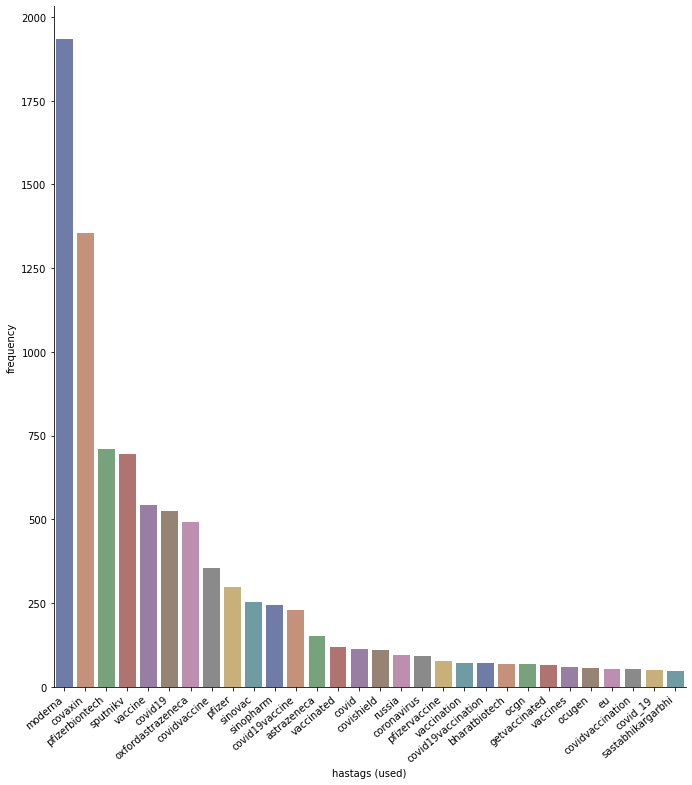

In [700]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=hasht_freq, kind="bar",
    x="hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hastags (used)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

In contrast, particular vaccines or the vaccination topic play the dominant role in the category of used hashtags. Politicians or institutions do not figure prominently in this category.

## Rank #s, append hashtag columns to dataframe

Idea: create df with vaccines in hashtags as columns and append it to df_tweety

In [701]:
def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

unique_hasht = to_1D(df_tweety['hashtags']).value_counts()[:30]

In [702]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [703]:
hasht_bool = boolean_df(df_tweety['hashtags'], unique_hasht.keys())
#Drop non-vaccine related columns
#hasht_bool.drop(['covid19', 'covid', 'china', 'russia', 'bharatbiotech', 'eu', 'india', 'covid_19', 'coronavirus'], axis=1)

## Rank mentioned @s, append columns to data frame

In [533]:
twitter_accounts = []
for tweet in df_tweety['text']:
    if '@' not in tweet:
        twitter_accounts.append('')
    words = tweet.split()
    for word in words:
        if re.search('@[^\s]+', word):
            twitter_accounts.append(word)
mentioned_accounts=pd.Series(np.array(twitter_accounts))
accounts = mentioned_accounts.value_counts().rename_axis('accounts').reset_index(name='count')
accounts

,accounts,count
0,,3483
1,@narendramodi,115
2,@sputnikvaccine,93
3,@BharatBiotech,82
4,@POTUS,61
...,...,...
1845,@ChrisCBS4,1
1846,@ryanstruyk,1
1847,@LeoVaradkar,1
1848,@retail_recruit,1


In [534]:
def to_1D(Series):
    return pd.Series([x for x in Series])

unique_handle = to_1D(mentioned_accounts).value_counts()[:30]
unique_handle

                    3483
@narendramodi        115
@sputnikvaccine       93
@BharatBiotech        82
@POTUS                61
@Ocugen               50
@ANI                  29
@WHO                  27
@pfizer               26
@globaltimesnews      22
@VP                   20
@PMOIndia             19
@DollyParton          18
@Russia               17
@drharshvardhan       16
@moderna_tx           15
@JoeBiden             14
@MoHFW_INDIA          14
@Reuters              14
@BorisJohnson         13
@DrTedros             13
@labyrinthweaver      13
@ImranKhanPTI         12
@FaheemYounus         11
@vonderleyen          11
@JustinTrudeau        10
@SkyNews              10
@chamath               9
@visshnumittal         9
@elonmusk              8
dtype: int64

In [535]:
def handle_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [536]:
handle_bool = handle_df(mentioned_accounts, unique_handle.keys())
handle_bool

,,@narendramodi,@sputnikvaccine,@BharatBiotech,@POTUS,@Ocugen,@ANI,@WHO,@pfizer,@globaltimesnews,...,@DrTedros,@labyrinthweaver,@ImranKhanPTI,@FaheemYounus,@vonderleyen,@JustinTrudeau,@SkyNews,@chamath,@visshnumittal,@elonmusk
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6566,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6567,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6568,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6569,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [757]:
df_tweety_vaccs = pd.concat([df_tweety, hasht_bool], axis=1)
df_tweety_vaccs = df_tweety_vaccs.drop(['id', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified', 'source', 'is_retweet',
       'date'], axis=1)

# Cleaning 'text' (round 1)

### Various removals, lowercase()

def CleanTweet(x):
    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub(r'\B#\S+','',x)
    #remove urls
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove special characters
    x = re.findall(r'\w+', x)
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    return x

In [705]:
#df_tweety.text = df_tweety.text.apply(CleanTweet)

In [706]:
#remove twitter handlers
df_tweety.text = df_tweety.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\#[^\s]+','',x))

#remove URLs
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x))

#remove punctuation
df_tweety.text = df_tweety.text.apply(lambda x:x.replace('[^\w\s]',''))

#remove special characters
#df_tweety.text = df_tweety.text.apply(lambda x:re.sub('[^A-Za-z0-9]+', '', x))

#remove single characters
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

#substitute multiple spaces with single space
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#lowercase
#df_tweety.text = df_tweety.text.apply(lambda x: ' '.join([word.lower() for word in x.split()]))

#remove numbers from words
#df_tweety.text = df_tweety.text.apply(lambda x: re.sub('\w*\d\w*', '', x))

#remove linebreaks
df_tweety.text = df_tweety.text.apply(lambda x: re.sub('\n', '', x))

#remove characters
#df_tweety.text = df_tweety.text.apply(lambda x: re.sub('[''""_/]', '', x))

#remove twitter handlers
df_tweety.text = df_tweety.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\B#\S+','',x))

#remove URLs
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x))

#remove punctuation
#df_tweety.text = df_tweety.text.apply(lambda x:x.replace('[^\w\s]',''))

#remove special characters
#df_tweety.text = df_tweety.text.apply(lambda x:' '.join(re.findall(r'\w+', x))) #re.sub('[^A-Za-z0-9]+', '', x)

#remove single characters
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

#substitute multiple spaces with single space
df_tweety.text = df_tweety.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#lowercase
#df_tweety.text = df_tweety.text.apply(lambda x: ' '.join([word.lower() for word in x.split()]))

#remove numbers from words
df_tweety.text = df_tweety.text.apply(lambda x: re.sub('\w*\d\w*', '', x))

#remove linebreaks
df_tweety.text = df_tweety.text.apply(lambda x: re.sub('\n', '', x))

#remove characters
#df_tweety.text = df_tweety.text.apply(lambda x: re.sub('[''""_/]', '', x))

# Feature engineering 'text'

### stopwords, stemming, lemmatizing

In [707]:
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
df_tweety.text = df_tweety.text.apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [541]:
#tokenize
#df_tweety.text = df_tweety.text.apply(lambda x: ' '.join([word_tokenize(word) for word in x.split() ]))

In [342]:
# stemming 
stemmer = PorterStemmer()
#df_tweety.text = df_tweety.text.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() ]))

In [343]:
# lemmazation
lemmatizer = WordNetLemmatizer()
df_tweety.text = df_tweety.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() ]))

Try to turn abbreviations into regular strings

# First sentiment analysis (VADER)

In [344]:
#!pip install vaderSentiment

In [611]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [708]:
analyser = SentimentIntensityAnalyzer()

scores=[]
for i in range(len(df_tweety['text'])):
    
    score = analyser.polarity_scores(df_tweety['text'][i])
    score=score['compound']
    scores.append(score)
    
sentiment=[]
for i in scores:
    if i>=0.06:
        sentiment.append('positive')
    elif i<=(-0.06):
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

df_tweety['sentiment']=pd.Series(np.array(sentiment))
df_tweety_vaccs['sentiment']=pd.Series(np.array(sentiment))

In [709]:
scores = pd.Series(np.array(scores))

In [710]:
df_scores = pd.DataFrame(scores).reset_index()
df_scores2 = df_scores.rename(columns={0: 'sentiment'})
df_scores2.columns

Index(['index', 'sentiment'], dtype='object')

<AxesSubplot:xlabel='index', ylabel='sentiment'>

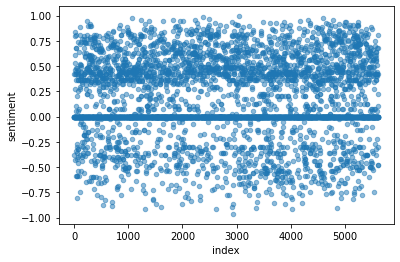

In [711]:
df_scores2.plot.scatter(x='index', y='sentiment', alpha=0.5)

## Sentiment Plotting

### General

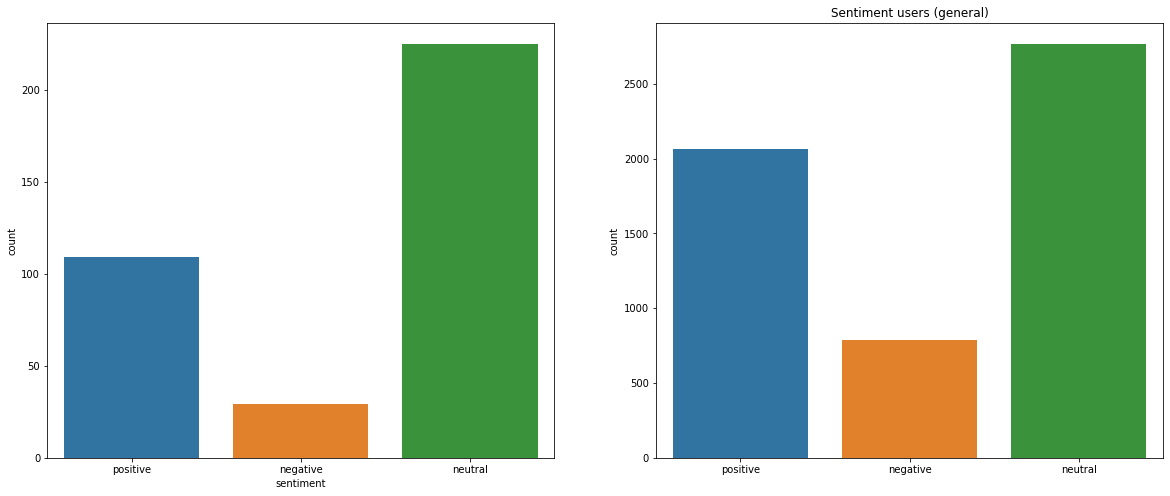

In [712]:
order_list = ['positive', 'negative', 'neutral']
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment',data=df_tweety[df_tweety['user_verified']==True], order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (verified)')
plt.subplot(1, 2, 2)
ax = sns.countplot(x='sentiment',data=df_tweety, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (general)')
plt.show()

### Vaccines

In [713]:
#Create subframes for plotting based on hashtag-bools
df_moderna = df_tweety_vaccs[(df_tweety_vaccs['moderna']==True)]
df_moderna = df_moderna[['moderna', 'sentiment']]

df_vacc = df_tweety_vaccs[(df_tweety_vaccs['vaccine']==True) | 
                          (df_tweety_vaccs['vaccinated']==True) |
                          (df_tweety_vaccs['vaccines']==True) |
                          (df_tweety_vaccs['covidvaccination']==True)|
                          #(df_tweety_vaccs['coronavaccine']==True)|
                          (df_tweety_vaccs['covid19vaccination']==True)]
#df_vacc = df_vacc['sentiment']

df_sinovac = df_tweety_vaccs[(df_tweety_vaccs['sinovac']==True)]
df_sinovac = df_sinovac[['sinovac', 'sentiment']]

df_sinopharm = df_tweety_vaccs[(df_tweety_vaccs['sinopharm']==True)]
df_sinopharm = df_sinopharm[['sinopharm', 'sentiment']]

df_biontech = df_tweety_vaccs[(df_tweety_vaccs['pfizerbiontech']==True)|
                              (df_tweety_vaccs['pfizer']==True)|
                              (df_tweety_vaccs['pfizervaccine']==True)]
df_biontech = df_biontech[['sentiment']]

df_astrazeneca = df_tweety_vaccs[(df_tweety_vaccs['astrazeneca']==True)|
                                (df_tweety_vaccs['oxfordastrazeneca']==True)|
                                (df_tweety_vaccs['moderna']==True)]

df_astrazeneca = df_astrazeneca[['sentiment']]

df_sputnik = df_tweety_vaccs[(df_tweety_vaccs['sputnikv']==True)]
df_sputnik = df_sputnik[['sputnikv', 'sentiment']]

#df_mrna = df_tweety_vaccs[(df_tweety_vaccs['mrna']==True)]
#df_mrna = df_mrna[['mrna', 'sentiment']]

[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Sputnik V')]

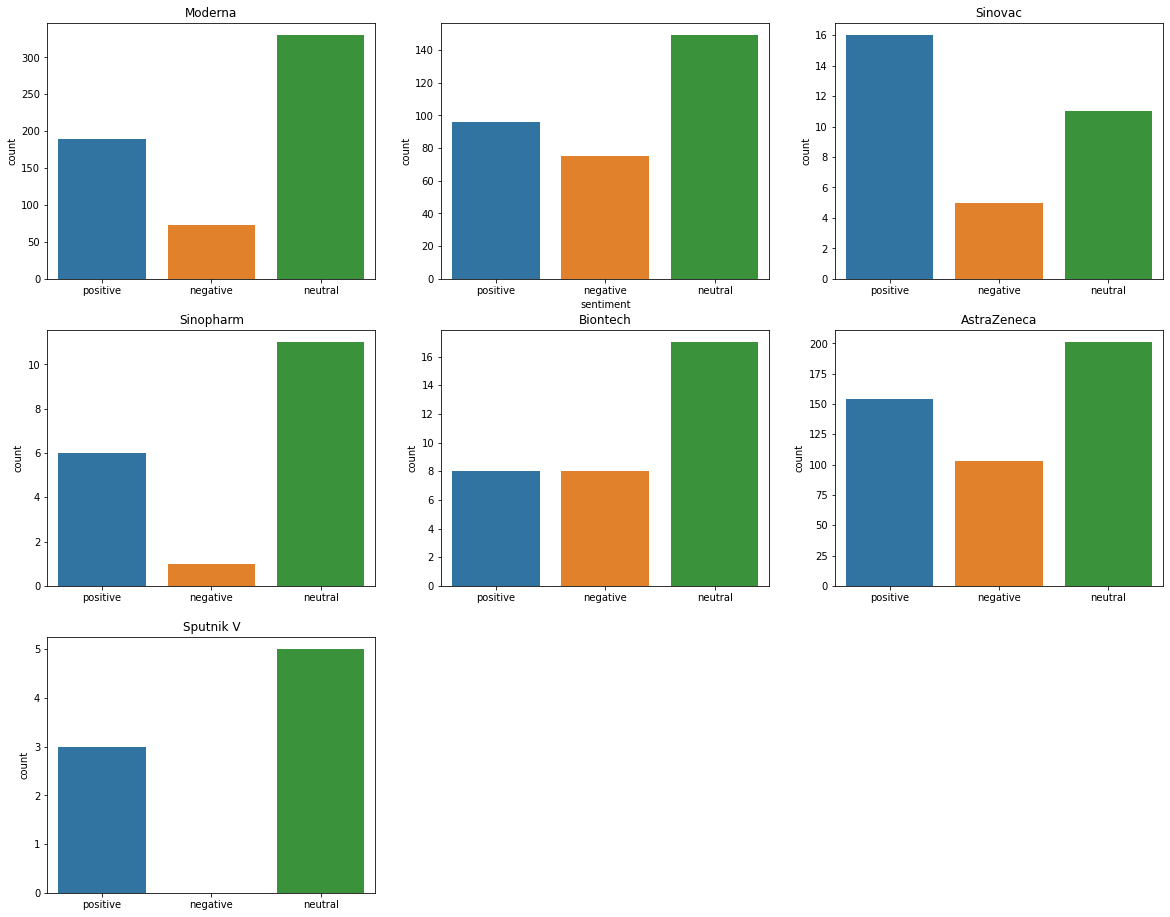

In [714]:
order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 16))

plt.subplot(3, 3, 1)
ax = sns.countplot(x='sentiment',data=df_vacc, order = order_list)
ax.set(xlabel='', ylabel='count', title='Vaccine')
plt.subplot(3, 3, 2)
sns.countplot(x='sentiment',data=df_moderna, order = order_list)
ax.set(xlabel='', ylabel='count', title='Moderna')
plt.subplot(3, 3, 3)
ax = sns.countplot(x='sentiment',data=df_sinovac, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinovac')

plt.subplot(3, 3, 4)
ax = sns.countplot(x='sentiment',data=df_sinopharm, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinopharm')
plt.subplot(3, 3, 5)
ax = sns.countplot(x='sentiment',data=df_biontech, order = order_list)
ax.set(xlabel='', ylabel='count', title='Biontech')
plt.subplot(3, 3, 6)
ax = sns.countplot(x='sentiment',data=df_astrazeneca, order = order_list)
ax.set(xlabel='', ylabel='count', title='AstraZeneca')

plt.subplot(3, 3, 7)
ax = sns.countplot(x='sentiment',data=df_sputnik, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sputnik V')
#plt.subplot(3, 3, 8)
#ax = sns.countplot(x='sentiment',data=df_mrna, order = order_list)
#ax.set(xlabel='', ylabel='count', title='mrna')


## Influential

Identify whether the most popular users tweet predominantly positively, negatively or neutrally. Is it possible to see, how their followers tweet? Is there a mutual influence?

Create a measure of influence

In [715]:
twinfluence1 = df_tweety.sort_values("user_followers", ascending=False)

### by 'user_follower'

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

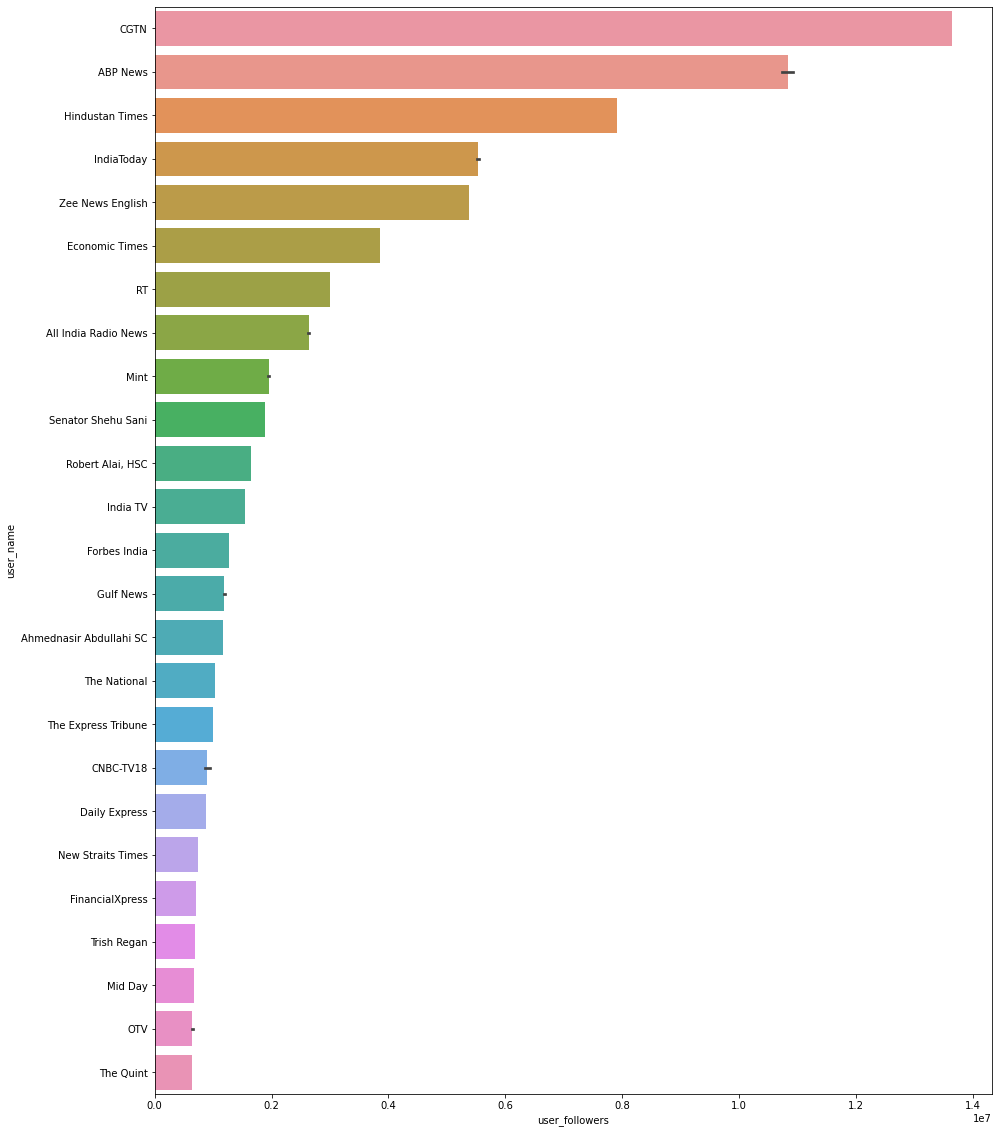

In [716]:
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x='user_followers', y='user_name', orient='h', data=twinfluence1[['user_name', 'user_followers']][:100])

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

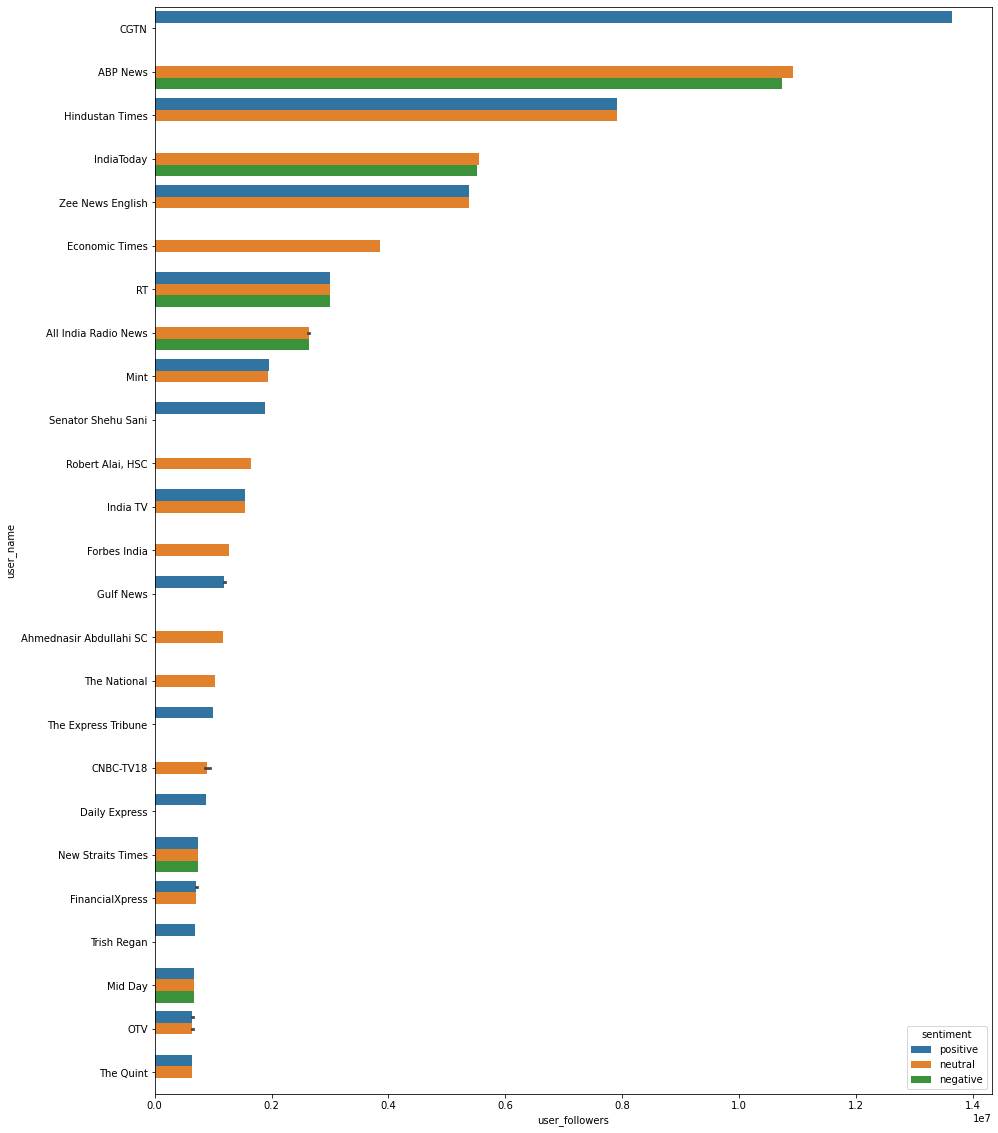

In [717]:
order_list = ['positive', 'negative', 'neutral']
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x='user_followers', y='user_name', hue='sentiment', orient='h', data=twinfluence1[['user_name', 'user_followers', 'sentiment']][:100])

In [718]:
# delete multiples for certain purposes! Written

### retweeted

<AxesSubplot:xlabel='retweets', ylabel='user_name'>

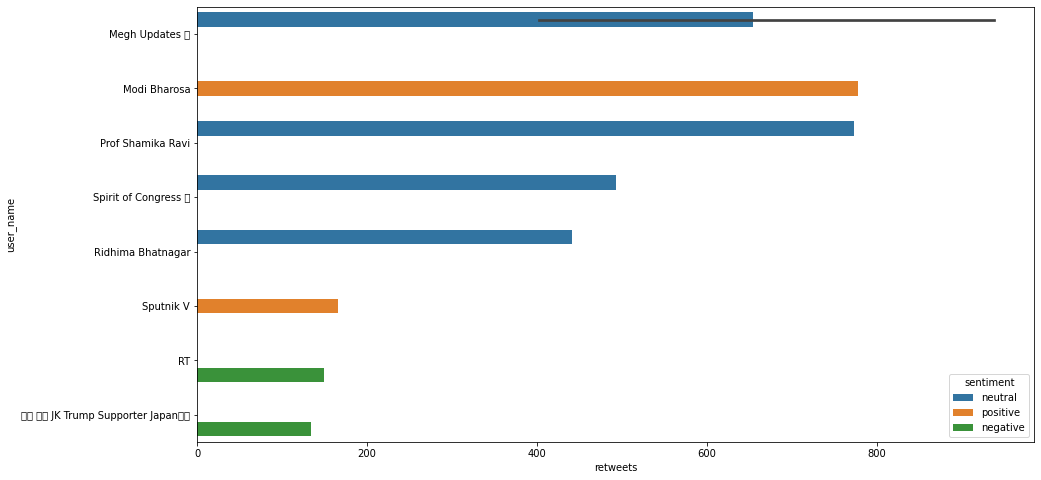

In [719]:
twinfluence2 = df_tweety.sort_values("retweets", ascending=False)

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='retweets', y='user_name', orient='h', hue='sentiment', data=twinfluence2[['retweets', 'user_name', 'sentiment']][:10])

### 'user_favourites'

<AxesSubplot:xlabel='favorites', ylabel='user_name'>

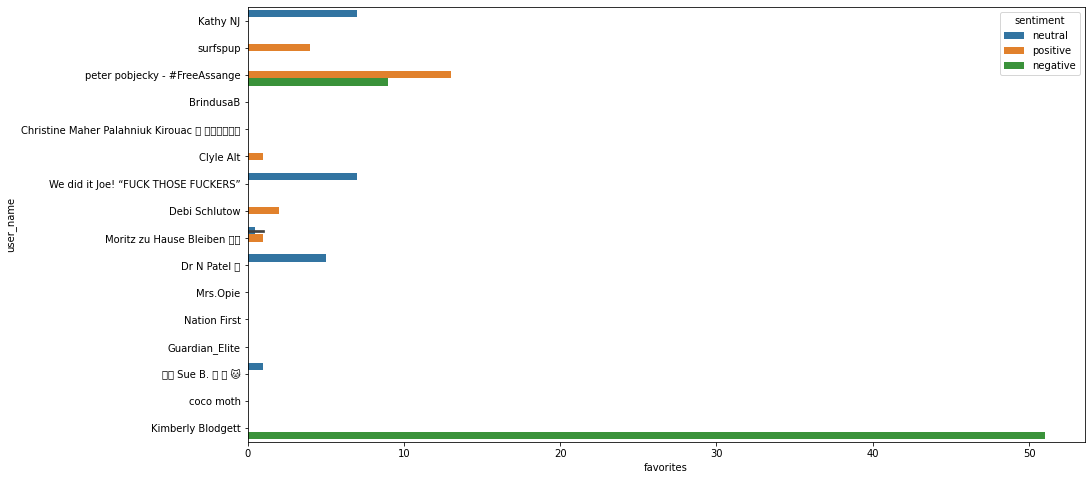

In [720]:
twinfluence3 = df_tweety.sort_values("user_favourites", ascending=False)

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='favorites', y='user_name',  hue='sentiment', orient='h', data=twinfluence3[['user_name', 'favorites', 'sentiment']][:20])

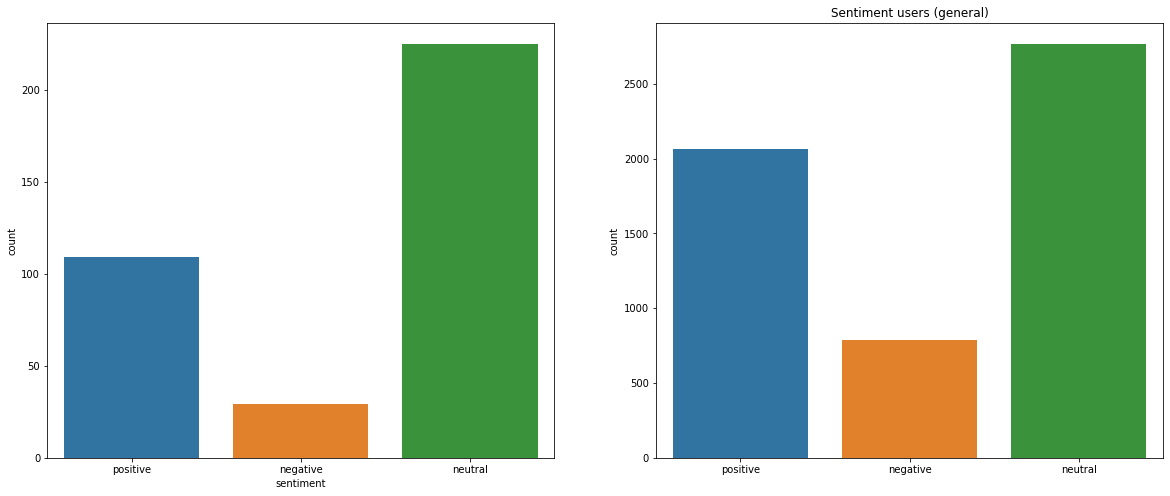

In [721]:
order_list = ['positive', 'negative', 'neutral']
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment',data=df_tweety[df_tweety['user_verified']==True], order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (verified)')
plt.subplot(1, 2, 2)
ax = sns.countplot(x='sentiment',data=df_tweety, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (general)')
plt.show()

In [722]:
#df_tweety = pd.concat([df_tweety, pd.get_dummies(df_tweety['sentiment'], drop_first=False, prefix='v')], axis=1)

### Number of tweets over time

In [723]:
over_days = df_tweety.groupby(['day'])['id'].count().reset_index()
over_days.columns = ['day', 'count']

(array([18611., 18628., 18642., 18659., 18673., 18687., 18701.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

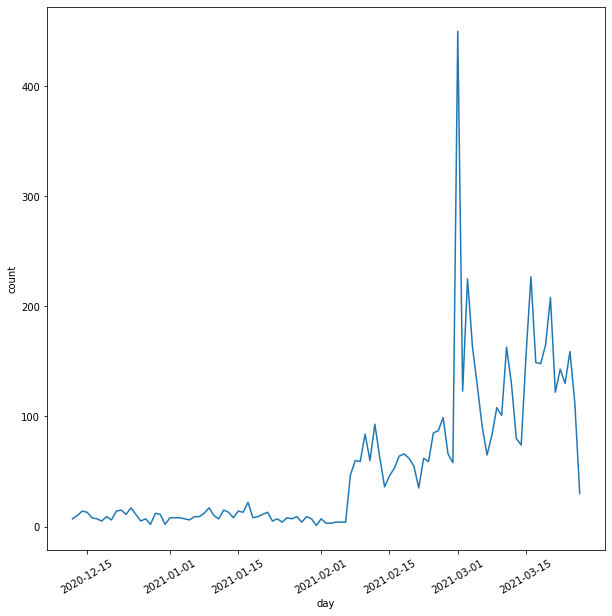

In [724]:

f, ax = plt.subplots(1,1, figsize=(10, 10))
sns.lineplot(x="day", y="count",
             data=over_days)
plt.xticks(rotation=30)

What happened on the first of march, in mid-february and in mid-march?

### Create dataframe for vaccination progress and sentiments over time

In [725]:
tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='user_created', aggfunc=pd.Series.nunique)

In [726]:
tweety_flat = pd.DataFrame(tweety_wide.to_records()).drop([0, 102, 103]).reset_index()

In [727]:
global_vacc = pd.read_csv('Data/df_global.csv')

In [728]:
global_vacc_senti = global_vacc.drop([12]).reset_index(drop=True)

In [729]:
global_vacc_senti[['negative', 'neutral', 'positive']] = tweety_flat[['negative', 'neutral', 'positive']]

In [730]:
global_vacc_senti.to_csv('Data/global_vacc_senti.csv')

In [731]:
#create dataframes for subcategories
#df = df_tweety[(df_tweety["user_followers"]>=10)]# & (df_tweety["user_verified"]==True)] (df_tweety["user_followers"]>=10)

<AxesSubplot:xlabel='day'>

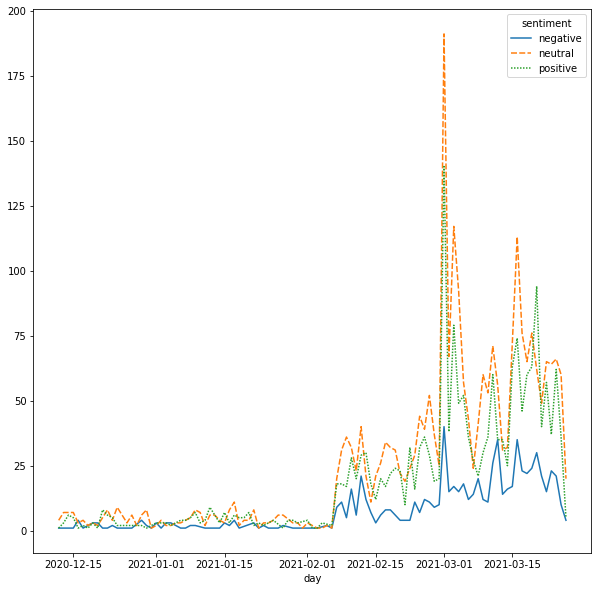

In [732]:
f, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=tweety_wide)

# Import labelled tweets and evaluate VADER

In [733]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

In [734]:
#!pip install pandas_ml

In [735]:
df_full_label = pd.read_csv('Data/fulltweets_labels2.csv', sep=';')

df_labels = df_full_label.copy()

In [737]:
df_tweety['label'] = df_labels['sentiment']

In [740]:
df_test = df_tweety[0:1000]

In [741]:
#change values from strings to numbers
booleans = {'negative': 0, 'positive': 1, 'neutral': 2}

df_test['label'] = df_test['label'].map(booleans)
df_test['sentiment'] = df_test['sentiment'].map(booleans)

In [805]:
#change series to arrays for evaluation
y_test = np.array(df_test['label'])
y_pred = np.array(df_test['sentiment'])
y_test = y_test.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [806]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 56  23  34]
 [ 25 211 134]
 [ 83 136 298]]

Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.52
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.56
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.34      0.50      0.40       113
     Class 2       0.57      0.57      0.57       370
     Class 3       0.64      0.58      0.61       517

    accuracy                           0.56      1000
   macro avg       0.52      0.55      0.53      1000
weighted avg       0.58      0.56      0.57      1000



In [274]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 58  22  32]
 [ 27 214 129]
 [ 82 143 292]]

Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.52
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.56
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.35      0.52      0.42       112
     Class 2       0.56      0.58      0.57       370
     Class 3       0.64      0.56      0.60       517

    accuracy                           0.56       999
   macro avg       0.52      0.55      0.53       999
weighted avg       0.58      0.56      0.57       999



In [743]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 56  23  34]
 [ 25 211 134]
 [ 83 136 298]]

Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.52
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.56
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.34      0.50      0.40       113
     Class 2       0.57      0.57      0.57       370
     Class 3       0.64      0.58      0.61       517

    accuracy                           0.56      1000
   macro avg       0.52      0.55      0.53      1000
weighted avg       0.58      0.56      0.57      1000



In [746]:
%matplotlib inline
import matplotlib.pyplot as plt

In [749]:
confusion.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Second sentiment analysis (BLOB)

In [750]:
# TextBlob - Python library for processing textual data
from textblob import TextBlob

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [751]:
#!pip install textblob

In [793]:
df = pd.read_csv('fulltweets.csv')
df_tweety2 = df.copy()

In [795]:
df_tweety_vaccs2 = pd.concat([df_tweety2, hasht_bool], axis=1)
df_tweety_vaccs2 = df_tweety_vaccs2.drop(['id', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified', 'source', 'is_retweet',
       'date'], axis=1)

In [796]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [797]:
df_tweety_vaccs2['subjectivity'] = df_tweety_vaccs2['text'].apply(getTextSubjectivity)
df_tweety_vaccs2['sentiment'] = df_tweety_vaccs2['text'].apply(getTextPolarity)

df_tweety2['subjectivity'] = df_tweety2['text'].apply(getTextSubjectivity)
df_tweety2['sentiment'] = df_tweety2['text'].apply(getTextPolarity)

In [759]:
# negative, nautral, positive analysis
def getTextAnalysis(tweet):
    if tweet >= 0.05:
        return "positive"
    elif tweet <= (-0.05):
        return "negative"
    else:
        return "neutral"

In [798]:
df_tweety_vaccs2['sentiment'] = df_tweety_vaccs2['sentiment'].apply(getTextAnalysis)
df_tweety2['sentiment'] = df_tweety2['sentiment'].apply(getTextAnalysis)

In [800]:
df_tweety2['label'] = df_labels['sentiment']

In [807]:
df_blobtest = df_tweety2[0:1000]

In [810]:
booleans = {'negative': 0, 'positive': 1, 'neutral': 2}

df_blobtest['label'] = df_blobtest['label'].map(booleans)
df_blobtest['sentiment'] = df_blobtest['sentiment'].map(booleans)

In [811]:
y_test = np.array(df_blobtest['label'])
y_pred = np.array(df_blobtest['sentiment'])
y_test = y_blobtest.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [812]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 20  29  64]
 [ 19 183 168]
 [ 44 138 335]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.45
Macro Recall: 0.44
Macro F1-score: 0.44

Weighted Precision: 0.53
Weighted Recall: 0.54
Weighted F1-score: 0.53

Classification Report

              precision    recall  f1-score   support

     Class 1       0.24      0.18      0.20       113
     Class 2       0.52      0.49      0.51       370
     Class 3       0.59      0.65      0.62       517

    accuracy                           0.54      1000
   macro avg       0.45      0.44      0.44      1000
weighted avg       0.53      0.54      0.53      1000



In [815]:
confusion.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'